In [320]:
import numpy as np; 
import operator; 
import pandas as pd; 
from matplotlib import pyplot as plt; 
import random as rd;
import collections;

In [321]:
def create_graph_auto(n):
    
    """
    Create_graph_auto(n): 
    It takes n as a size of nxn square matrix and creates the complete graph automatically. 
    """
    G= np.zeros((n+1, n+1))
    for i in range(1, n+1):
        for j in range(1, n+1):
            if((i==0 or j==0) or i==j ):
                continue;
                
            elif(G[i][j]==0):
                G[i][j]= rd.randint(1, 9)
                G[j][i]= G[i][j]
            else: 
                continue;
                
    return G

n= int(input())
create_graph_auto(n)

4


array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  3.,  3.],
       [ 0.,  1.,  0.,  3.,  9.],
       [ 0.,  3.,  3.,  0.,  8.],
       [ 0.,  3.,  9.,  8.,  0.]])

In [322]:
def create_graph(n):
    """
    Create_graph(n): 
        It takes n as size of nxn square matrix and allows user to create graph as they want.
        It is manual version of create_graph_auto.
    """
    G= np.zeros((n+1, n+1))
    edges= int(n*(n-1)/2)
    
    for _ in range(edges):
        x, y, weight= map(float, input("x, y and weight: ").split(" "))
        assert (x!=y),  "self loop error"
        G[x][y]= G[y][x]= weight
        
    return G

In [323]:
def create_route(citylist):
    """
    Create_route(citylist):
    It takes list of number as citylist and returns the different arrangement of list
    by permutation and combination. 
    """
    route= rd.sample(citylist, len(citylist))
    return route


create_route([2,3,4,5])

[4, 5, 3, 2]

In [324]:
def initPopulation(pop_size, citylist):
    """
    InitPopulation(pop_size, citylist): 
    It takes pop_size and citylist as input and initalize population or mating pool 
    by the help of utility function create_route. 
    
    """
    #type(citylist)
    population = []
    #type(population)
    for _ in range(0, pop_size):
        population.append(create_route(citylist))
    return np.asarray(population)

In [325]:
def create_cityList(n):
    """
    Create_cityList(n): creates city list..
    """
    cityList= list(range(1, n+1))
    return cityList; 

In [326]:
n= 6
path= create_graph_auto(n); 
print(path.shape); 

cityList= create_cityList(n)
population = initPopulation(20, cityList)

print(f"Population = {population}"); 


(7, 7)
Population = [[6 5 1 2 4 3]
 [5 6 4 3 1 2]
 [3 2 5 1 4 6]
 [5 1 4 3 6 2]
 [2 4 5 3 1 6]
 [3 1 4 6 5 2]
 [5 2 1 4 3 6]
 [3 2 5 6 1 4]
 [1 4 5 6 3 2]
 [3 1 5 4 6 2]
 [6 3 2 4 1 5]
 [4 6 1 3 5 2]
 [5 2 1 3 6 4]
 [5 2 3 6 4 1]
 [3 4 1 5 2 6]
 [3 2 6 1 5 4]
 [5 1 3 6 4 2]
 [5 2 1 3 6 4]
 [5 2 1 4 3 6]
 [6 4 1 2 3 5]]


In [327]:
class Fitness():

    def __init__(self, route, graph):
        """
        Fiteness(self, route= list or rank 0 matrix, graph= adjacency_matrix): creates 
        the object of Fitness class which calculates the routeCost and fitness attached. 
        """
        self.route= route; 
        self.cost= 0.0; 
        self.fitness=0.0;
        self.graph= graph; 
        
    def routeCost(self):
        """
        RouteCost(self): calculates cost related to particular route.
        """
        if self.cost==0.0:
            pathdistance= 0; 
            for i in range(len(self.route)):
                fromCity= self.route[i]
                toCity= None
                if i+1<len(self.route):
                    toCity= self.route[i+1]
                else:
                    toCity= self.route[0]
            
                pathdistance+= self.graph[fromCity][toCity]
            
            self.cost= pathdistance
        
        return self.cost
    
    def routeFitness(self):
        """
        RouteFitness(self): Computes the fitness over the route. 
        """
        if self.fitness == 0:
            self.fitness=1/float(self.routeCost())
            
        return self.fitness

In [328]:
def rankRoute(population, G):
    """
    RankRoute(population, G): order the route on the basis of route cost. 
    """
    fitnessResult= {}
    #newPop= {}
    newPop= np.zeros((len(population), len(population[0])), dtype= np.int)
    for i in range(len(population)):
        #newPop[i]= []
        
        fitnessResult[i]= Fitness(population[i], G).routeFitness()
    rankLi=  sorted(fitnessResult.items(), key = operator.itemgetter(1), reverse = True)
    for i in range(len(rankLi)):
        newPop[i]= population[rankLi[i][0]]
    return newPop
        

print(type(population))
rankedPop = rankRoute(population, path)

print(rankedPop)

#help(Fitness)
    
    

<class 'numpy.ndarray'>
[[6 4 1 2 3 5]
 [6 3 2 4 1 5]
 [6 5 1 2 4 3]
 [1 4 5 6 3 2]
 [3 2 5 1 4 6]
 [3 1 4 6 5 2]
 [5 2 3 6 4 1]
 [5 6 4 3 1 2]
 [5 2 1 4 3 6]
 [3 2 5 6 1 4]
 [5 2 1 4 3 6]
 [4 6 1 3 5 2]
 [5 1 3 6 4 2]
 [3 1 5 4 6 2]
 [5 2 1 3 6 4]
 [3 2 6 1 5 4]
 [5 2 1 3 6 4]
 [2 4 5 3 1 6]
 [5 1 4 3 6 2]
 [3 4 1 5 2 6]]


In [329]:
for i in range(len(rankedPop)):
    print(f"routeCost= {Fitness(rankedPop[i], path).routeCost()}" )
#population

routeCost= 12.0
routeCost= 18.0
routeCost= 19.0
routeCost= 20.0
routeCost= 22.0
routeCost= 22.0
routeCost= 22.0
routeCost= 23.0
routeCost= 23.0
routeCost= 23.0
routeCost= 23.0
routeCost= 24.0
routeCost= 26.0
routeCost= 27.0
routeCost= 28.0
routeCost= 28.0
routeCost= 28.0
routeCost= 29.0
routeCost= 30.0
routeCost= 30.0


##selection...

In [330]:
def Selection(population, parentSize , G):
    """
    Selection(population, parentSize, G):..
    It takes population, parentSize= number of parent you want to form, G= Graph or travelling path of in TSP.
    It selects the parent by tournament method where tournament size is fixed to two. 
    """
    #parent= {}
    parent= np.zeros((parentSize, len(population[0])), dtype= np.int)
    #for i in range(parentSize):
        #parent[i]= []
        
    
    for i in range(parentSize):
        while True: 
            p1Index= rd.randint(0, len(population)-1)
            p2Index= rd.randint(0, len(population)-1)
            p3Index= rd.randint(0, len(population)-1)
            p4Index= rd.randint(0, len(population)-1)

            if p1Index!=p2Index and p3Index!=p4Index:
                #print(f"p1Ind= {p1Index}\np2Ind= {p2Index}\np3Ind= {p3Index}\np4Ind= {p4Index}")
                break

        p1= population[p1Index]
        p2= population[p2Index]
        p3= population[p3Index]
        p4= population[p4Index]


        f1= Fitness(p1, G).routeFitness()
        f2= Fitness(p2, G).routeFitness()
        f3= Fitness(p3, G).routeFitness()
        f4= Fitness(p4, G).routeFitness()
        #select fittest..
 #       parent[i].append( p1 if f1>f2 else p2)        
 #       parent[i].append( p3 if f3>f4 else p4)
    
        p1= p1 if f1>f2 else p2
        p3= p3 if f3>f4 else p4
        
        fp1= Fitness(p1, G).routeFitness()
        fp3= Fitness(p3, G).routeFitness()
        
        parent[i]= p1 if fp1>fp3 else p3
        
        #check list are identical or not... wrong implemetation below..
            
    return parent;
        
        
        

In [331]:
#Parents are in dict format.. 20 parents are chosen to breed the 10 new off-springs by cross-over
#later will create the diversity by mutation.. 

In [332]:

parents= Selection(population, 10, path)
print(parents)

print()

[[5 2 1 4 3 6]
 [6 5 1 2 4 3]
 [3 2 5 6 1 4]
 [6 3 2 4 1 5]
 [3 2 5 1 4 6]
 [5 2 1 4 3 6]
 [3 2 5 6 1 4]
 [6 5 1 2 4 3]
 [6 4 1 2 3 5]
 [4 6 1 3 5 2]]



# crossOver beginss..

In [333]:
#firstCrossPoint = np.random.randint(0,len(parent1)-2)
#secondCrossPoint = np.random.randint(firstCrossPoint+1,len(parent1)-1

### Making of crossOverOperator...

In [334]:
def CrossOverOperator(p1, p2, coPnt1, coPnt2):
    
    """ 
    CrossOverOperator(p1, p2, xOverPoint1, xOverPoint2)....
        it returns numpy 2D array of two child created by two parents.
        It implemets 2 point xOver. 
    """
    ch1= np.zeros(len(p1))
    ch2= np.zeros(len(p2))
    #print(p1.shape)

    xgenes1= ch1[coPnt1:coPnt2+1]= p2[coPnt1:coPnt2+1]
    xgenes2= ch2[coPnt1:coPnt2+1]= p1[coPnt1:coPnt2+1]
    
    geneMapping1= {}
    geneMapping2= {}
    for i in range(len(xgenes1)):
        geneMapping1[xgenes1[i]]= xgenes2[i]
        geneMapping2[xgenes2[i]]= xgenes1[i]
        
#crossover..      
    for i in range(len(ch1)):
        if((i>=0 and i<coPnt1) or (i>coPnt2 and i<len(ch1))):
            x= p1[i]
            y= p2[i]
            while(x in ch1):
                x= geneMapping1[x]
            ch1[i]=x

            while(y in ch2):
                y= geneMapping2[y]
            ch2[i]=y
        
    return np.asarray([ch1, ch2], dtype= np.int16) 
    
    
p1= np.array([1, 2, 3, 4])
p2= np.array([4, 3, 1, 2])
child= CrossOverOperator(p1, p2, 1, 2)

print(child)


[[2 3 1 4]
 [4 2 3 1]]


In [335]:
def crossOver(parents):
    """
    CrossOver(parents): parents in dictionary format where the key serves as index number and returns the offspring
    as crossover result.
    """
    chrmsmlen= len((parents[0]))
    while True:
        coPnt1= rd.randint(0, chrmsmlen-2)
        coPnt2= rd.randint(coPnt1+1, chrmsmlen-1)
        if(coPnt1!=coPnt2):
            break
            

    #offsprings= {}
    offsprings = np.zeros((2*len(parents)-2, chrmsmlen ), dtype= np.int )
    j=0
    for i in range(len(parents)):
        #if j<len(parents):
            #offsprings[j]= [];
        if(i+1 < len(parents)):
            p1= parents[i]
            p2= parents[i+1]
            #print(f"p1= {p1}, p2= {p2}")
            offspring= CrossOverOperator(p1, p2, coPnt1, coPnt2)
            offsprings[j]= offspring[0]
            j=j+1
            offsprings[j]= offspring[1]
            j=j+1
            
            #print(f"offSpring1= {offspring[0]}, offSpring2= {offspring[1]}")
            
            print()
            
    
    return offsprings;
                        
        
offsprings= crossOver(parents)
print(offsprings)   
            
        










[[5 3 1 2 4 6]
 [6 5 1 4 3 2]
 [2 4 5 6 1 3]
 [3 6 1 2 4 5]
 [3 5 2 4 1 6]
 [4 3 5 6 1 2]
 [6 3 5 1 4 2]
 [3 5 2 4 1 6]
 [5 2 1 4 3 6]
 [3 2 5 1 4 6]
 [3 2 5 6 1 4]
 [5 2 1 4 3 6]
 [3 6 1 2 4 5]
 [2 4 5 6 1 3]
 [6 5 1 2 3 4]
 [6 3 1 2 4 5]
 [6 4 1 3 5 2]
 [4 6 1 2 3 5]]


### mutation

In [355]:
def mutate(offSpring):
    "Mutation(offSpring): takes input a chromosome as zero rank matrix and bring mutation in it."
    while True:
        pos1= rd.randint(0, len(offSpring)-1)
        pos2= rd.randint(1, len(offSpring)-1)
        if pos1!=pos2:
            break; 
            
    temp= offSpring[pos1]
    offSpring[pos1]= offSpring[pos2]
    offSpring[pos2]= temp
    
    return offSpring
    
    
#offSpring= [1, 2, 3, 4]
#offSpring= mutate(offSpring)
#print(offSpring)
        
    
    

In [354]:
def mutation(offSprings, mutation_rate):
    for i in range(len(offSprings)):
        rate= rd.uniform(0, 1)
        
        if(rate> 1- mutation_rate):
            
            mutated= mutate(offSprings[i])
            offSprings[i]= mutated
    return offSprings
            
#print(f"before mutation: {offsprings}")
#offsprings= mutation(offsprings, 0.25)
#print(f"after mutation: {offsprings}")

In [352]:
#print(offsprings)

In [353]:
"""
print("For parents: ")
for i in range(len(parents)):
    print(f"   fitness= {Fitness(parents[i], path).routeCost()}" )
print("For offsprings: ")
for i in range(len(offsprings)):
    #print(offsprings[i])
    print(f"   fitness= {Fitness(offsprings[i], path).routeCost()}" )
    
"""

'\nprint("For parents: ")\nfor i in range(len(parents)):\n    print(f"   fitness= {Fitness(parents[i], path).routeCost()}" )\nprint("For offsprings: ")\nfor i in range(len(offsprings)):\n    #print(offsprings[i])\n    print(f"   fitness= {Fitness(offsprings[i], path).routeCost()}" )\n    \n'

In [343]:
def newGeneration(population, offsprings, G, ratio= 0.25):
    """
    NewGeneration(population, offsprings, G, ratio= 0.25): 
    The funtion takes the population and brings a generation shift by mixing the good breeds 
    from the offsprings which eleminates out the weak individual present in the population.
    
    default value of ratio is 0.25
    """
    population= rankRoute(population, G)
    offsprings= rankRoute(offsprings, G)
    fraction= int(len(population)*ratio)
    
    #print(f"fractionsize= {fraction}")
    #print(population[fraction::, ::].shape)
    #print(offsprings[0:fraction, ::].shape)
    
    #print(population[-1:len(population)-fraction-1:-1, ::].shape)
    
    population[-1:len(population)-fraction-1:-1, ::]= offsprings[0:fraction, ::]
    return population

print(f"at G0: ")
for i in range(len(population)):
    print(Fitness(population[i], path).routeCost())
population= newGeneration(population, offsprings, path)
print(f"atG1: ")
for i in range(len(population)):
    print(Fitness(population[i], path).routeCost())

print(len(population))

at G0: 
19.0
23.0
22.0
30.0
29.0
22.0
23.0
23.0
20.0
27.0
18.0
24.0
28.0
22.0
30.0
28.0
26.0
28.0
23.0
12.0
atG1: 
12.0
18.0
19.0
20.0
22.0
22.0
22.0
23.0
23.0
23.0
23.0
24.0
26.0
27.0
28.0
22.0
18.0
17.0
17.0
15.0
20


In [344]:
help(Selection)
help(mutation)

Help on function Selection in module __main__:

Selection(population, parentSize, G)
    Selection(population, parentSize, G):..
    It takes population, parentSize= number of parent you want to form, G= Graph or travelling path of in TSP.
    It selects the parent by tournament method where tournament size is fixed to two.

Help on function mutation in module __main__:

mutation(offSprings, mutation_rate)



# GA BEGINS...

In [376]:
def GA(population, graph,parentSize,mutation_rate= 0.25, iteration= 300):
    pop= population
    
    
    """
    GA(population, graph, parentSize, mutation_rate= 0.25, iteration= 300):
        It implements Genetic Algorithm uses selection method type tournament 
        of size 2. 
    """
    progress = np.zeros((iteration, 1), dtype= np.int)
    for gen in range(iteration):
        
        print(f"Generation= {gen}: ")
        for i in range(len(population)):
            print(Fitness(pop[i], graph).routeCost())
        
        progress[gen]= Fitness(pop[0], graph).routeCost()
        
        parents= Selection(pop, parentSize, graph)
        offsprings= crossOver(parents)
        offsprings= mutation(offsprings, mutation_rate)
        pop= newGeneration(pop, offsprings, graph)
        
        
    X= np.asarray(list(range(iteration))).reshape(iteration, 1)
    #route= list(pop[0]).append(pop[0][0])
    return X, progress, pop[0]


## test GA with your Own Input

In [377]:
X, progress= GA(population, path, 10)

Generation= 0: 
376
380
335
374
376
367
392
342
395
383
365
382
367
420
397
342
367
337
377
335
344
397
379
405
322
402
391
336
365
388
341
412
350
400
364
398
363
367
359
424









Generation= 1: 
322
335
335
336
337
341
342
342
344
350
359
363
364
365
365
367
367
367
367
374
376
376
377
379
380
382
383
388
391
392
367
361
361
354
347
345
317
313
313
291









Generation= 2: 
291
313
313
317
322
335
335
336
337
341
342
342
344
345
347
350
354
359
361
361
363
364
365
365
367
367
367
367
367
374
343
341
337
336
335
335
334
331
320
291









Generation= 3: 
291
291
313
313
317
320
322
331
334
335
335
335
335
336
336
337
337
341
341
342
342
343
344
345
347
350
354
359
361
361
331
328
327
315
315
311
304
291
291
291









Generation= 4: 
291
291
291
291
291
304
311
313
313
315
315
317
320
322
327
328
331
331
334
335
335
335
335
336
336
337
337
341
341
342
329
328
324
322
300
291
291
291
291
291









Generation= 5: 
291
291
291
291
291
291
291
291
291
291
300
304
311
313
313

253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 57: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 58: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 59: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 60: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 61: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
25

253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 143: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 144: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 145: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 146: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 147: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
2

253
253
253
253
253
253
253
253
253
253
253









Generation= 224: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
268
253
253
253
253
253
253
253
253
253









Generation= 225: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 226: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 227: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 228: 
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253
253









Generation= 

ValueError: too many values to unpack (expected 2)

In [ ]:
path= create_graph_auto(9)
cityList= list(range(1, 9+1))
population= initPopulation(30, cityList )


X, progress, route= GA(population, path, 10)

# plotting the progress..

In [ ]:

plt.plot(X[:, 0],progress[:,0])
plt.xlabel('generation')
plt.ylabel('cost')
plt.title('cost vs generation')
plt.show()

print(f"best route= {route}")


In [387]:
#create graph
#initalize city list
#initialize population
#X, progress, route= GA(pop, path, parentsize)
"""
maastricht 0   29  20  21  16  31  100 12  4   31  18
    aachen 29  0   15  29  28  40  72  21  29  41  12
   heerlen 20  15  0   15  14  25  81  9   23  27  13
   sittard 21  29  15  0   4   12  92  12  25  13  25
    geleen 16  28  14  4   0   16  94  9   20  16  22
      echt 31  40  25  12  16  0   95  24  36  3   37
      bonn 100 72  81  92  94  95  0   90  101 99  84
  hulsberg 12  21  9   12  9   24  90  0   15  25  13
     kanne 4   29  23  25  20  36  101 15  0   35  18
       ohe 31  41  27  13  16  3   99  25  35  0   38
      epen 18  12  13  25  22  37  84  13  18  38  0     
      
      
Expected OutCome= 253KM
"""


'\nmaastricht 0   29  20  21  16  31  100 12  4   31  18\n    aachen 29  0   15  29  28  40  72  21  29  41  12\n   heerlen 20  15  0   15  14  25  81  9   23  27  13\n   sittard 21  29  15  0   4   12  92  12  25  13  25\n    geleen 16  28  14  4   0   16  94  9   20  16  22\n      echt 31  40  25  12  16  0   95  24  36  3   37\n      bonn 100 72  81  92  94  95  0   90  101 99  84\n  hulsberg 12  21  9   12  9   24  90  0   15  25  13\n     kanne 4   29  23  25  20  36  101 15  0   35  18\n       ohe 31  41  27  13  16  3   99  25  35  0   38\n      epen 18  12  13  25  22  37  84  13  18  38  0     \n      \n      \nExpected OutCome= 253KM\n'

In [385]:
path= np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\
                [0, 0, 29, 20, 21, 16, 31, 100, 12, 4, 31, 18],\
                [0, 29, 0, 15, 29, 28, 40, 72, 21, 29, 41, 12],\
                [0, 20, 15, 0, 15, 14, 25, 81, 9, 23, 27, 13],\
                [0, 21, 29, 15, 0, 4, 12, 92, 12, 25, 13, 25],\
                [0, 16, 28, 14, 4, 0, 16, 94, 9, 20, 16, 22],\
                [0, 31, 40, 25, 12, 16, 0, 95, 24, 36, 3, 37],\
                [0, 100, 72, 81, 92, 94, 95, 0, 90, 101, 99, 84],\
                [0, 12, 21, 9, 12, 9, 24, 90, 0, 15, 25, 13],\
                [0, 4, 29, 23, 25, 20, 36, 101, 15, 0, 35, 18],\
                [0, 31, 41, 27, 13, 16, 3, 99, 25, 35, 0 ,38],\
                [0, 18, 12, 13, 25, 22, 37, 84, 13, 18, 38, 0]])

cityList= create_cityList(11)

population = initPopulation(50, cityList)
X, progress, route= GA(population, path, 10, 0.7,500)


Generation= 0: 
362
368
387
333
377
349
369
405
320
382
400
370
326
311
390
300
405
360
347
371
369
383
368
386
401
374
392
379
373
371
336
417
363
397
374
389
348
366
361
380
382
388
360
346
354
364
370
366
399
360









Generation= 1: 
300
311
320
326
333
336
346
347
348
349
354
360
360
360
361
362
363
364
366
366
368
368
369
369
370
370
371
371
373
374
374
377
379
380
382
382
383
386
359
356
355
350
347
347
328
314
313
310
305
275









Generation= 2: 
275
300
305
310
311
313
314
320
326
328
333
336
346
347
347
347
348
349
350
354
355
356
359
360
360
360
361
362
363
364
366
366
368
368
369
369
370
370
362
356
353
353
347
346
345
338
333
324
318
293









Generation= 3: 
275
293
300
305
310
311
313
314
318
320
324
326
328
333
333
336
338
345
346
346
347
347
347
347
348
349
350
353
353
354
355
356
356
359
360
360
360
361
326
320
319
315
312
310
310
300
296
287
282
282









Generation= 4: 
275
282
282
287
293
296
300
300
305
310
310
310
311
312
313
314
315
318
319
320
320


Generation= 47: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
290
279
272
264
255
255
254
254
254
254
254
254









Generation= 48: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
285
285
279
278
278
277
275
267
254
254
254
254









Generation= 49: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
285
275
274
273
269
260
257
254
254
254
254
254









Generation= 50: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
294
294
294
290
285
269
254
254
254
254
254
254









Generation= 51: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254

254
254
254
254
254
254
294
294
285
274
267
267
257
257
255
254
254
254









Generation= 91: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
294
294
294
292
272
264
260
254
254
254
254
254









Generation= 92: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
295
283
274
267
254
254
254
254
254
254
254
254









Generation= 93: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
294
292
290
275
264
261
261
257
255
254
254
254









Generation= 94: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
275
274
254
254
254
254
254
254
254
254
254
254









Generation= 95:

254









Generation= 127: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
295
294
283
277
272
264
261
260
254
254
254
254









Generation= 128: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
285
285
279
279
273
272
269
260
254
254
254
254









Generation= 129: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
299
299
299
294
279
273
269
254
254
254
254
254









Generation= 130: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
307
295
279
274
254
254
254
254
254
254
254
254









Generation= 131: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
2

272
272
267
254
254
254
254
254
254









Generation= 205: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
275
274
269
264
260
257
257
254
254
254
254
254









Generation= 206: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
279
272
267
264
261
257
254
254
254
254
254
254









Generation= 207: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
295
294
294
285
278
264
260
254
254
254
254
254









Generation= 208: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
304
301
295
294
285
273
267
254
254
254
254
254









Generation= 209: 
254
254
254
254
254
254
254
2

254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
295
295
292
283
274
274
267
261
260
254
254
254









Generation= 243: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
279
272
267
255
254
254
254
254
254
254
254
254









Generation= 244: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
290
278
274
267
260
257
254
254
254
254
254
254









Generation= 245: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
283
282
278
274
274
273
269
257
255
254
254
254









Generation= 246: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254


254
254
254
254
254
290
285
278
260
260
257
255
254
254
254
254
254









Generation= 308: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
292
279
278
274
273
261
261
254
254
254
254
254









Generation= 309: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
310
302
301
294
279
269
269
264
254
254
254
254









Generation= 310: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
294
274
269
267
267
264
254
254
254
254
254
254









Generation= 311: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
285
285
285
275
269
267
264
261
254
254
254
254









Generation= 312

254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
295
295
285
260
257
257
254
254
254
254
254
254









Generation= 350: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
278
264
264
257
257
254
254
254
254
254
254
254









Generation= 351: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
278
275
272
272
267
257
254
254
254
254
254
254









Generation= 352: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
283
272
269
264
264
255
254
254
254
254
254
254









Generation= 353: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254


261
257
254
254
254
254
254
254









Generation= 388: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
272
269
267
267
260
255
254
254
254
254
254
254









Generation= 389: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
272
267
264
255
254
254
254
254
254
254
254
254









Generation= 390: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
290
285
272
269
267
257
257
254
254
254
254
254









Generation= 391: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
295
277
274
274
267
257
254
254
254
254
254
254









Generation= 392: 
254
254
254
254
254
254
254
254
2

254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
295
279
278
278
274
267
257
254
254
254
254
254









Generation= 453: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
283
278
275
273
264
255
254
254
254
254
254
254









Generation= 454: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
307
294
279
273
273
257
257
254
254
254
254
254









Generation= 455: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
269
269
257
257
254
254
254
254
254
254
254
254









Generation= 456: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
325
315
309
285


254
254
254
254
254
254
254
254
254
254
254
254
254
254
290
285
277
275
275
261
254
254
254
254
254
254









Generation= 493: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
269
267
264
261
257
257
254
254
254
254
254
254









Generation= 494: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
290
283
279
260
260
257
254
254
254
254
254
254









Generation= 495: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
295
290
290
285
274
257
254
254
254
254
254
254









Generation= 496: 
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
254
278
274
274
273
269
269
260
257
254


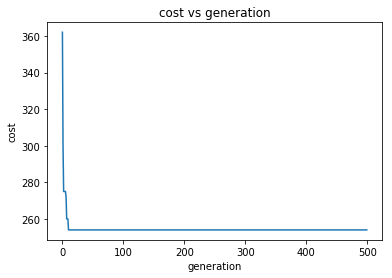

best route= [ 2  7  3  4  6 10  5  8  1  9 11]


In [386]:
plt.plot(X[:, 0],progress[:,0])
plt.xlabel('generation')
plt.ylabel('cost')
plt.title('cost vs generation')
plt.show()

print(f"best route= {route}")